#  Project Name: Health Insurance Cost Prediction

Project Type: EDA Analysis

Project Presented by: Vinay Raj Singh

# Summary

The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.

# Problem Statement:

1.   What are the primary factors influencing medical expenses?
2.   How accurate are machine learning models in predicting medical expenses?
3.   In what ways can machine learning models enhance the efficiency and
     profitability of health insurance companies?

# Coding section:

**Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# load your csv
df_insurance = pd.read_csv("/content/medical_insurance_cleaned.csv")


In [4]:
# print the first five rows
print("print the first five rows:\n")
df_insurance.head()

print the first five rows:



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# print the number of column and rows
print(f'number of rows and columns: {df_insurance.shape}')
print(f'number of columns: {df_insurance.shape[1]}')
print(f'number of rows: {df_insurance.shape[0]}')

number of rows and columns: (1190, 7)
number of columns: 7
number of rows: 1190


In [7]:
# dataset information
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   object 
 2   bmi       1190 non-null   float64
 3   children  1190 non-null   int64  
 4   smoker    1190 non-null   object 
 5   region    1190 non-null   object 
 6   charges   1190 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.2+ KB


In [8]:
# missing values/null values count
df_insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Understanding your variables:

In [9]:
# dataset columns
print("columns present in the dataset:")
print(df_insurance.columns)

print("\n data types of columns:")
print(df_insurance.dtypes)

columns present in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

 data types of columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [10]:
# description of dataset
print("description of dataset:")
df_insurance.describe()

description of dataset:


,age,bmi,children,charges
count,1190.000000,1190.000000,1190.000000,1190.000000
mean,39.027731,29.993147,1.088235,9908.046614
std,14.050554,5.873027,1.216558,7186.405555
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4418.591062
50%,39.000000,29.700000,1.000000,8378.605575
75%,51.000000,33.770000,2.000000,12955.356300
max,64.000000,46.750000,5.000000,34303.167200


# Variables description

   Check unique values for each variable

In [11]:
print("unique values in each column:")
print(df_insurance.nunique())


unique values in each column:
age           47
sex            2
bmi          512
children       6
smoker         2
region         4
charges     1190
dtype: int64


# Data wrangling

In [12]:
# checking for duplicates
print("checking for duplicates:")
df_insurance.duplicated().sum()


checking for duplicates:


np.int64(0)

In [13]:
# feature engineering
df_insurance["age group"] = pd.cut(
    df_insurance["age"] * (df_insurance["age"].max() - df_insurance["age"].min()) + df_insurance["age"].min(),
    bins=[10, 20, 30, 40, 50, 60, 70, 80], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]
)
df_insurance = pd.get_dummies(df_insurance, columns=["age group"], drop_first=True)

# insurance per age ratio
df_insurance["insurance per age ratio"] = df_insurance["charges"] / df_insurance["age"]
print("new features added!")

new features added!


<Axes: >

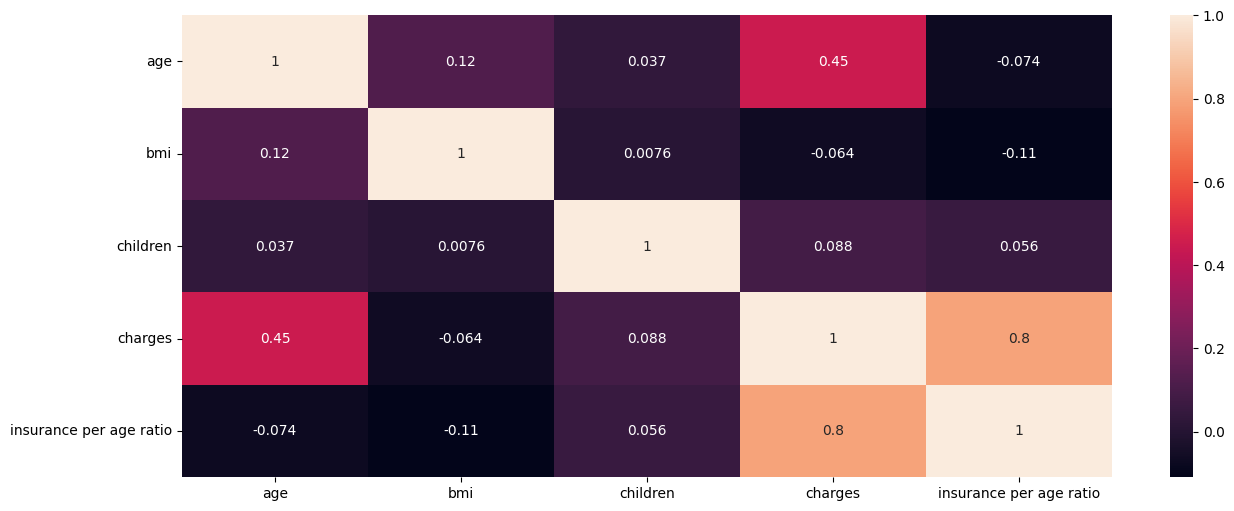

In [14]:
# Select only numeric columns for correlation calculation
numeric_df = df_insurance.select_dtypes(include=np.number)

plt.figure(figsize=(15, 6))
sns.heatmap(numeric_df.corr(), annot=True)

# key observations:


1. **Age vs Charges → 0.45 correlation**

   Positive moderate correlation.

   Older individuals tend to have higher insurance charges.

2. **BMI vs Charges → -0.064 correlation (very weak, negative)**

   BMI has almost no direct effect on charges in this dataset.

   Suggests BMI alone may not determine cost.

3. **Children vs Charges → 0.088 correlation (very weak, positive)**

   Having more children shows little effect on insurance charges.

4. **Insurance per Age Ratio vs Charges → 0.80 correlation**

   Very strong positive correlation.

   Suggests your engineered feature (insurance per age ratio) strongly aligns with charges (expected, since it’s derived from them).

5. **Other Weak Correlations:**

   Age vs BMI → 0.12 (almost no relationship).

   Age vs Children → 0.037 (nearly no relationship).

   BMI vs Children → 0.0076 (negligible).

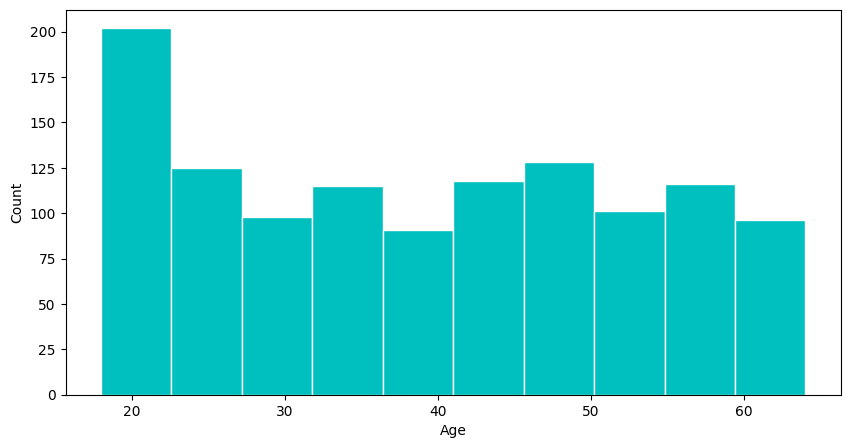

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df_insurance['age'], edgecolor='white', label='d',color='c')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title = ('Age Distrubtion in the Dataset')

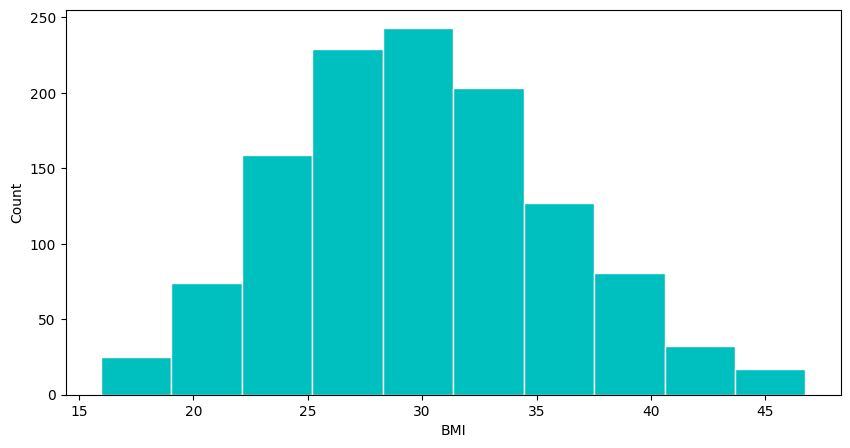

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df_insurance['bmi'], edgecolor='white', label='d',color='c')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title = ("BMI Distrubtion in the Dataset")

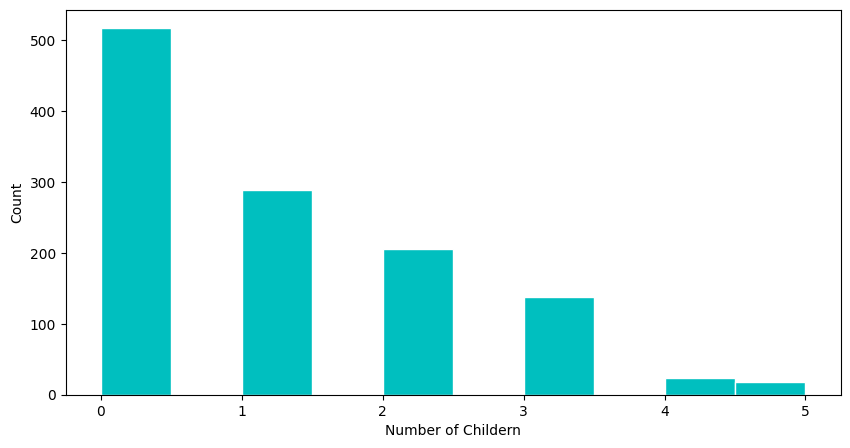

In [17]:
plt.figure(figsize=(10,5))
plt.hist(df_insurance["children"], edgecolor='white', label='d',color='c')
plt.xlabel("Number of Childern")
plt.ylabel("Count")
plt.title = ("Childern Distrubtion in the Dataset")

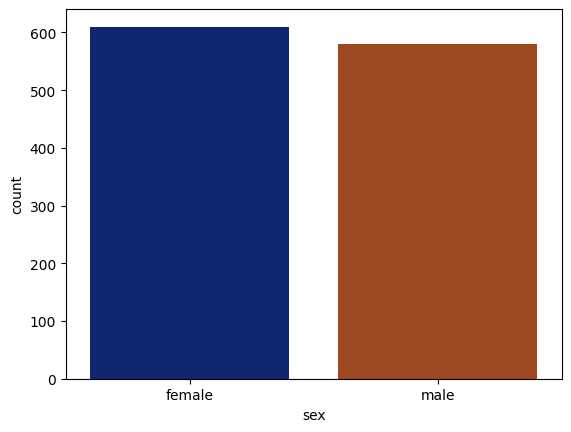

In [18]:
sex_plot =sns.countplot(x='sex',data=df_insurance,palette='dark')

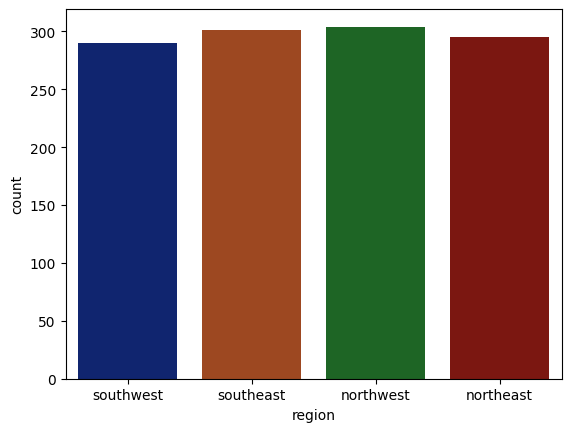

In [19]:
sex_plot =sns.countplot(x='region',data=df_insurance,palette='dark')

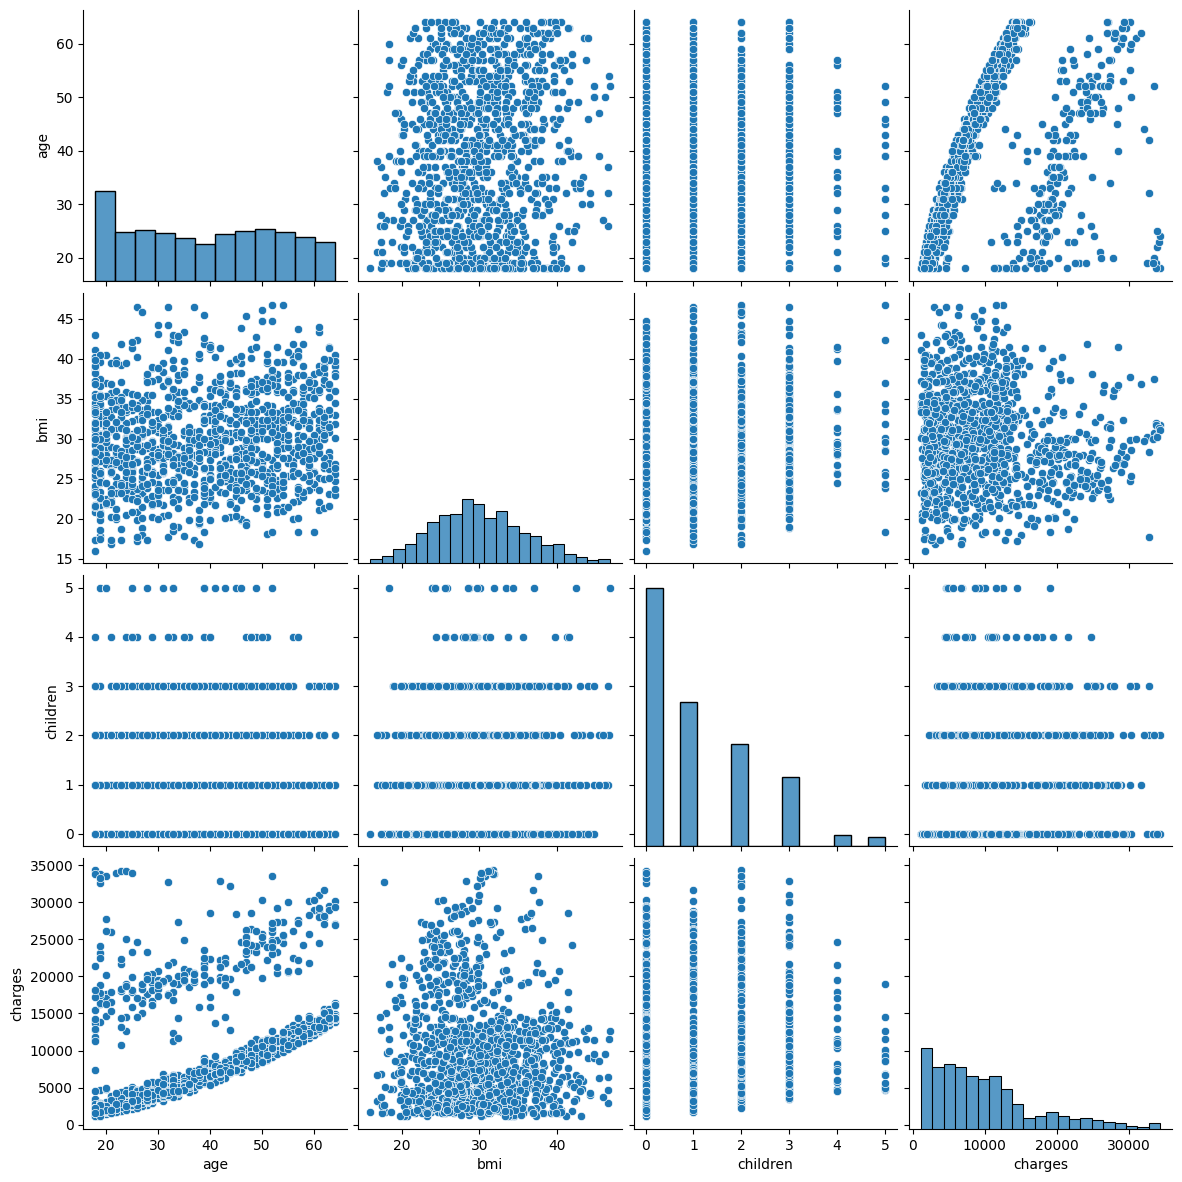

In [20]:
numerical_features = ['age', 'bmi', 'children', 'charges']
pairplot = sns.pairplot(df_insurance[numerical_features],height=3)

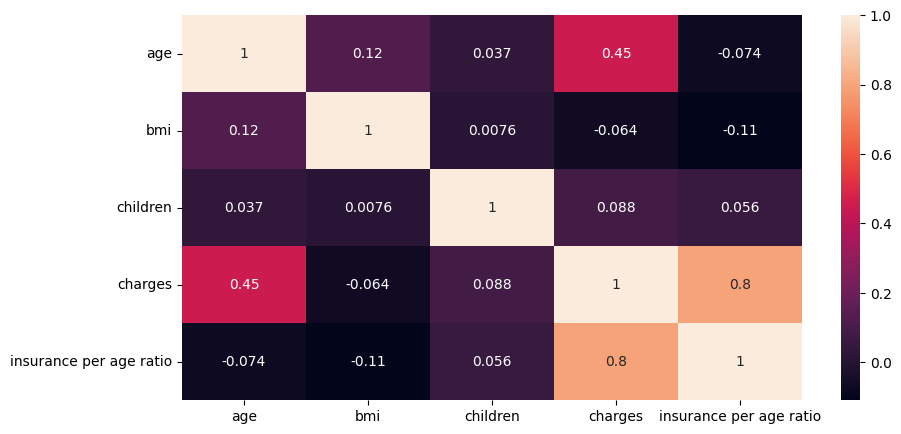

In [21]:
numerical_df = df_insurance.select_dtypes(include='number')

fig, ax = plt.subplots(figsize=(10,5))
dataplot = sns.heatmap(numerical_df.corr(),annot=True,ax=ax)

<Axes: xlabel='charges', ylabel='bmi'>

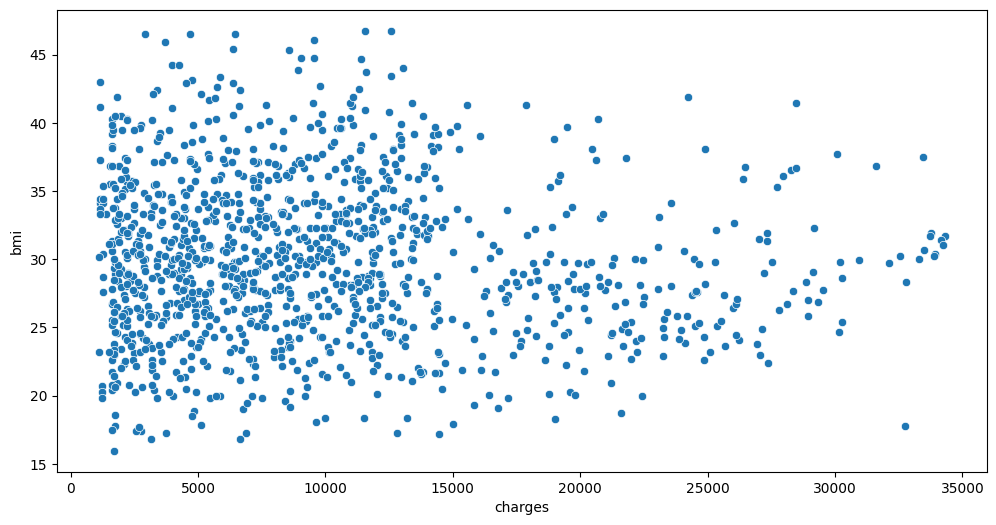

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="charges", y="bmi", data=df_insurance)

# key observations:

1. **No Strong Linear Relationship:**

  Points are scattered widely, with no clear trend.

  Confirms the weak correlation (-0.064) we saw earlier between BMI and Charges.

2. **BMI Distribution:**

  Most individuals have a BMI between 25 and 35 (overweight to obese range).

  Insurance charges are spread widely for these BMI values.

3. **High Charges Outliers:**

  Some individuals with charges above 20,000–30,000 appear across different BMI ranges (not concentrated in just high BMI).

  Suggests factors other than BMI (like age, smoking, or sex) strongly influence charges.

4. **Low Charges Cluster:**

  A dense cluster of people with low charges (<10,000) exists across nearly all BMI ranges.

  Indicates that BMI alone is not a good predictor of insurance cost.

5. **Overall Takeaway:**

  BMI does not significantly impact charges directly.

  Other factors (like smoking status, age, or medical conditions) are likely    driving the high charges.

In [23]:
object_cols = df_insurance.select_dtypes(include='object').columns

for col in object_cols:
    print(f"{col}: {df_insurance[col].unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


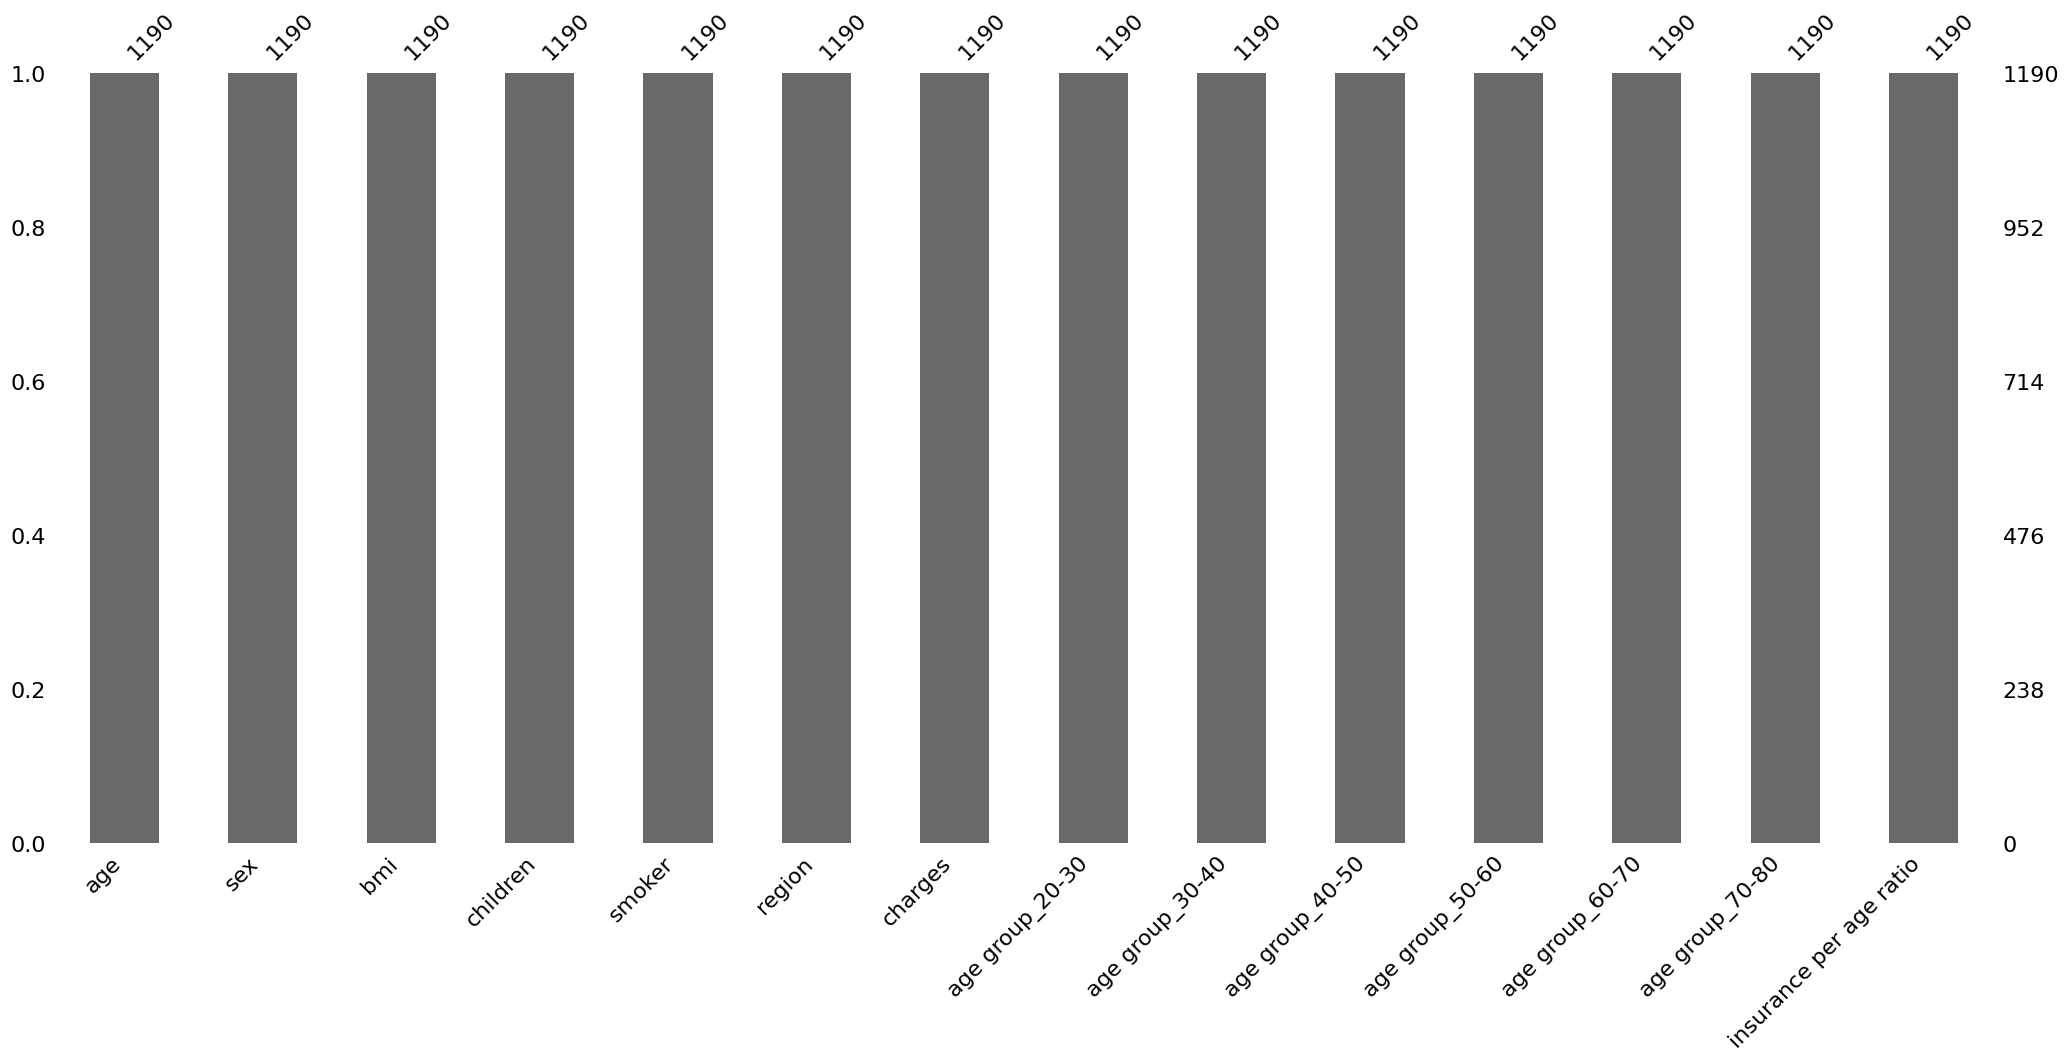

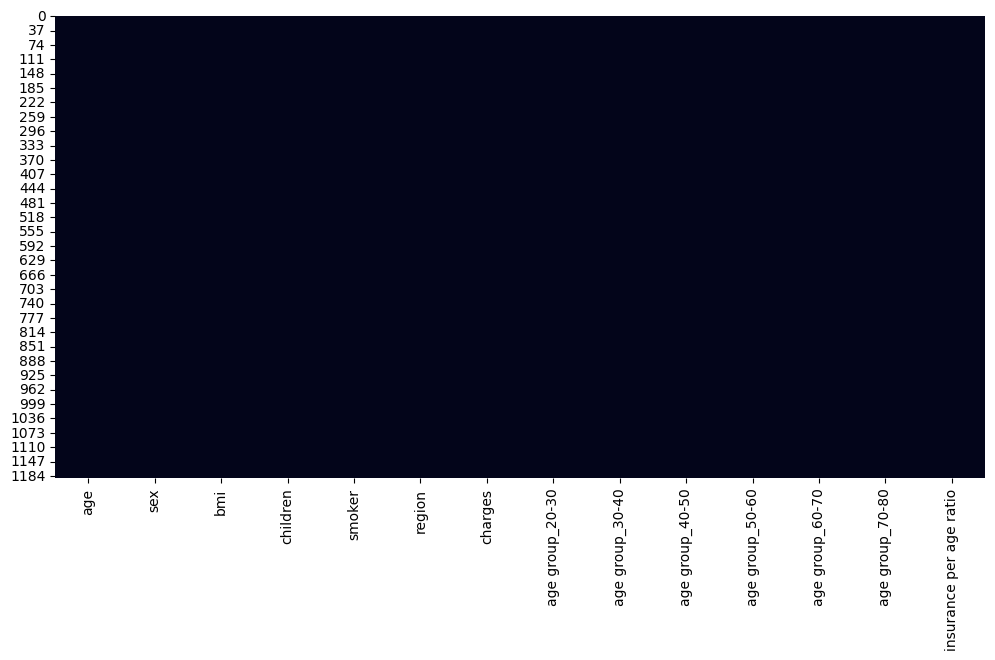

In [24]:
# visualizing the missing data
msno.bar(df_insurance)
plt.show()

# create a heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df_insurance.isnull(), cbar=False)
plt.show()

In [25]:
import plotly.express as px

fig = px.scatter(df_insurance, x='age', y='bmi', color='region', hover_data=['charges'])
fig.update_layout(title='Scatter Plot of Age vs. BMI', xaxis_title='Age', yaxis_title='BMI')
fig.show()

# key observations:

1. **BMI is fairly consistent across ages:**

  No strong upward or downward trend in BMI with age.

  People across all ages (18–64) show a wide BMI range (15–45).

2. **Clusters of BMI:**

  Most people’s BMI lies between 25 and 35, regardless of age.

  Indicates that overweight/obese range is common across all age groups.

3. **Regional Spread**:

  All four regions (southwest, southeast, northwest, northeast) appear evenly distributed.

  No clear region-specific BMI trend (e.g., no one region is consistently higher/lower).

4. **Outliers:**

  Some individuals with very high BMI (>40) exist across different ages and regions.

  These could represent cases of severe obesity, possibly linked to higher insurance charges.

5.  **Overall Takeaway:**

  BMI is not strongly age-dependent; lifestyle and other factors likely dominate.

  Regional impact on BMI seems minimal in this dataset.

  Outliers with extreme BMI values may need separate analysis, especially when linked to high charges.

In [26]:
from plotly.offline import iplot

fig = px.box(df_insurance, x='region', y='charges', color='region', notched=True)
fig.update_layout(title='Box Plot of Charges by Region', xaxis_title='Region', yaxis_title='Charges')
fig.show()

# key observations:


1. Median Charges

Median charges are quite similar across all four regions (around $9k).

Suggests region doesn’t strongly affect the typical insurance charges.

2. Spread & Variation

The northeast has the widest spread in charges (from ~1.7k to ~34k).

The southwest and southeast have slightly narrower spreads, but still significant.

3. Outliers

All regions show a number of high outliers (>25k charges).

Northeast and southeast especially have many high-charge outliers, meaning some individuals there incur much higher medical costs.

4. Quartiles

50% of people in each region have charges between ~5k and ~14k.

That’s the “typical” cost range regardless of region.

5. Overall Takeaway:

Region doesn’t drastically influence typical charges, but it does influence variation.

Northeast region shows the highest variation and extreme outliers, meaning people there may be at risk of very high charges.

Outliers likely represent individuals with chronic conditions, older age, or very high BMI.

In [28]:
import pandas as pd
import plotly.express as px

# Bubble plot
fig = px.scatter(
    df_insurance,
    x="age",
    y="bmi",
    size="charges",       # Bubble size = insurance charges
    color="region",       # Different colors for regions
    hover_name="sex",     # Shows extra info on hover (you can change)
    size_max=50,          # Max bubble size
    opacity=0.7,
    title="Bubble Plot: Age vs BMI with Charges and Region"
)

fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="BMI")
fig.show()


# key observations:


1. **Age vs BMI Distribution:**
- The data points are spread widely across both age and BMI axes, suggesting no tight correlation between the two.
- Younger individuals (ages 20–30) show a wide range of BMIs, from underweight to obese, indicating lifestyle or genetic diversity.
2. **Bubble Size (Charges):**
- Larger bubbles tend to cluster around higher BMI and older age groups, implying that medical or insurance charges increase with age and BMI.
- A few outliers with very large bubbles at moderate BMI and age suggest that charges can spike due to other factors (e.g., chronic conditions, smoking, or pre-existing health issues).
3. **Regional Patterns (Bubble Colors):**
- Southeast (red) and Southwest (blue) regions appear more frequently in the higher BMI and charge zones.
- Northwest (green) and Northeast (purple) bubbles are more evenly distributed, possibly indicating better health outcomes or different healthcare cost structures.


In [29]:
fig=px.bar(df_insurance,x='age',y='charges',color='sex',barmode='group')
fig.show()

In [30]:
import pandas as pd
import plotly.express as px

# Grouped bar chart
fig = px.histogram(
    df_insurance,
    x="region",
    color="smoker",     # groups by smoker/non-smoker
    barmode="group",    # grouped bars
    title="Counts of Smokers vs Non-Smokers by Region"
)

fig.update_xaxes(title_text="Region")
fig.update_yaxes(title_text="Counts")
fig.show()


# key observations:

1. **Non-Smokers Dominate Across All Regions**:
- In every region—southeast, southwest, northwest, and northeast—the number of non-smokers (red bars) is significantly higher than smokers (blue bars).
- For example, the southwest region shows 265 non-smokers, which is a substantial count compared to its smoker population.
2. **Regional Variation in Smoking Rates**:
- While non-smokers are the majority everywhere, the gap between smokers and non-smokers varies:
- Southeast and southwest appear to have relatively higher smoker counts than northwest and northeast.
- This could reflect cultural, socioeconomic, or policy differences influencing smoking behavior.


In [31]:
import pandas as pd
import plotly.express as px

# Bubble plot with sex
fig = px.scatter(
    df_insurance,
    x="age",
    y="bmi",
    size="charges",     # bubble size by charges
    color="sex",        # bubble color by sex
    hover_name="region",# show region when hovering
    size_max=50,
    opacity=0.7,
    title="Bubble Plot: Age vs BMI with Charges grouped by Sex"
)

fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="BMI")
fig.show()


# key observations:

1. **Age vs BMI Spread:**
- The data spans a wide range of ages and BMIs, showing that individuals of all ages can have low or high BMI.
- There's no tight correlation between age and BMI, but clusters do emerge—especially in middle-aged and older groups with higher BMI.
2. **Bubble Size (Charges):**
- Larger bubbles—indicating higher charges—tend to appear more frequently among individuals with higher BMI and older age.
- One standout example: a 61-year-old female from the southeast region with a BMI of 36.3 and charges over $77,000. That’s a significant outlier and may reflect chronic conditions or intensive care.
3. **Sex-Based Trends (Color):**
- Red bubbles (female) and blue bubbles (male) are fairly evenly distributed, but:
- Some of the largest bubbles appear to be female, especially in older age brackets and higher BMI ranges.
- This could suggest that female patients may incur higher charges in certain scenarios—possibly due to longer life expectancy, more frequent healthcare visits, or specific health conditions


In [32]:
import pandas as pd
import plotly.express as px

# Horizontal stacked bar chart
fig = px.histogram(
    df_insurance,
    y="sex",           # Category on Y-axis
    color="smoker",    # Stacked by smoker status
    barmode="stack",   # stacked bars
    title="Count of Patients by Sex and Smoker Status",
    text_auto=True     # show counts on bars
)

fig.update_xaxes(title_text="Counts")
fig.update_yaxes(title_text="Sex")
fig.show()


# key observations:

1. Non-Smokers Dominate:
- Both males (511) and females (543) have significantly more non-smokers than smokers.
- This is a positive public health indicator, suggesting that the majority of the population avoids smoking.
2. Male Smokers Outnumber Female Smokers:
- Male smokers: 159
- Female smokers: 67
- That’s more than double the number of female smokers, indicating that smoking is more prevalent among men in this dataset.


# Conclusion

From the regional analysis of insurance charges, we can conclude that the median medical charges remain fairly consistent across all four regions (Southwest, Southeast, Northwest, and Northeast), averaging around $9,000. This suggests that the region alone does not significantly impact the typical cost of medical charges.

However, there are important differences in variation:

1. The Northeast region shows the widest distribution of charges, with several extreme high-cost outliers reaching above $30,000.

2. The Southwest and Southeast have relatively narrower ranges but still present a substantial number of outliers.

3. Outliers in all regions highlight cases of individuals with exceptionally high charges, likely driven by factors such as age, BMI, smoking habits, or chronic conditions.

Overall, while the average cost is stable across regions, the risk of extremely high charges is more pronounced in the Northeast and Southeast. This indicates that insurers and healthcare policymakers may need to account for higher variability in these regions when setting premiums or planning healthcare resources.

**Thank You**